In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import normalize, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_absolute_error

In [ ]:
!pip install shap
!pip install pycountry-convert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 15.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 62.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.2/228.2 kB 1.7 MB/s eta 0:00:00
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=c1e06d65a3865c98f51ed8a6879b473ee4cbc9778e5800bc40d8d0783020c13e
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


In [ ]:
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import copy
import numpy as np
import torch
import tqdm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import shap
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
import copy


# LIME

## Part a

In [ ]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)
model.eval();

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 147MB/s]


## Part b

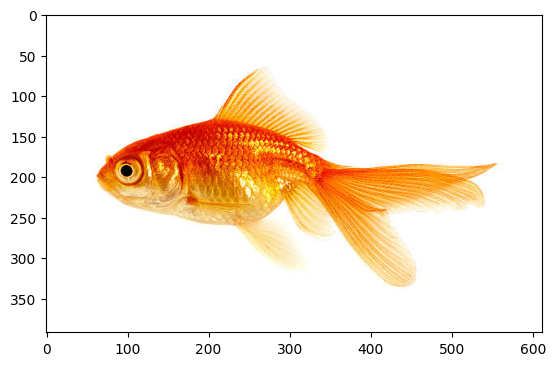

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os, json
from PIL import Image
import torch.nn.functional as F


path = '/content/drive/MyDrive/My-Courses/Truthworthy_AI/HWs/HW2/goldfish.jpg'

with open(os.path.abspath(path), 'rb') as f:
    with Image.open(f) as img:
           img.convert('RGB')

#img = get_image('./data/dogs.png')
plt.imshow(img)

In [ ]:
my_file = open("/content/drive/MyDrive/My-Courses/Truthworthy_AI/HWs/HW2/imagenet_classes.txt", "r")

# reading the file
data = my_file.read()

# replacing end splitting the text
# when newline ('\n') is seen.
classes = data.split("\n")
print(classes)
my_file.close()

['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel', 'kite', 'bald eagle', 'vulture', 'great grey owl', 'European fire salamander', 'common newt', 'eft', 'spotted salamander', 'axolotl', 'bullfrog', 'tree frog', 'tailed frog', 'loggerhead', 'leatherback turtle', 'mud turtle', 'terrapin', 'box turtle', 'banded gecko', 'common iguana', 'American chameleon', 'whiptail', 'agama', 'frilled lizard', 'alligator lizard', 'Gila monster', 'green lizard', 'African chameleon', 'Komodo dragon', 'African crocodile', 'American alligator', 'triceratops', 'thunder snake', 'ringneck snake', 'hognose snake', 'green snake', 'king snake', 'garter snake', 'water snake', 'vine snake', 'night snake', 'boa constrictor', 'rock python', 'Indian cobra', 'green mamba', 'sea snake', 'horned viper', 'diamondback', 

In [ ]:
from torchvision import models, transforms
def get_input_transform():
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])
    transf = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        normalize
    ])

    return transf

def get_input_tensors(img):
    transf = get_input_transform()
    # unsqeeze converts single image to batch of 1
    return transf(img).unsqueeze(0)

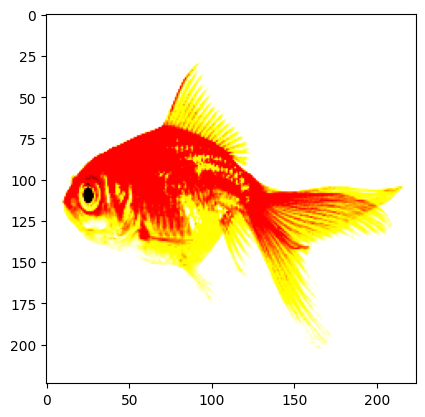

In [ ]:
img_t = get_input_tensors(img)
plt.imshow(np.array(img_t.permute(0, 2, 3, 1)[0]))

In [ ]:
idx2label, cls2label, cls2idx = [], {}, {}

idx2label = [k for k in range(len(classes))]
cls2label = {k: classes[k] for k in range(len(classes))}
cls2idx   = {classes[k] : k for k in range(len(classes))}

In [ ]:
#test = torch.rand(img)

model.eval()
scores = model(img_t)

idx = torch.argmax(scores)
print(idx)
print(classes[idx])

tensor(1)
goldfish


In [ ]:
probs = F.softmax(scores, dim=1)
probs5 = probs.topk(5)

In [ ]:
idx5 = probs5[1]
for i, j in enumerate(idx5[0]):
    #print(i)
    print("index: ", idx5[0][i], " - probabiliy:", probs5[0][0][i], " - class: ", classes[j])

index:  tensor(1)  - probabiliy: tensor(0.9999, grad_fn=<SelectBackward0>)  - class:  goldfish
index:  tensor(389)  - probabiliy: tensor(2.5205e-05, grad_fn=<SelectBackward0>)  - class:  barracouta
index:  tensor(0)  - probabiliy: tensor(1.2054e-05, grad_fn=<SelectBackward0>)  - class:  tench
index:  tensor(397)  - probabiliy: tensor(4.0026e-06, grad_fn=<SelectBackward0>)  - class:  puffer
index:  tensor(395)  - probabiliy: tensor(2.7846e-06, grad_fn=<SelectBackward0>)  - class:  gar


## Part c

In [ ]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=ab40e1c1d4af0437b1db4e630c1621d5bfd72f7becc5630a816ec2ca1c37b444
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime import lime_image
import numpy as np

In [ ]:
def get_pil_transform():
    transf = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(224)
    ])

    return transf

def get_preprocess_transform():
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])
    transf = transforms.Compose([
        transforms.ToTensor(),
        normalize
    ])

    return transf

pill_transf = get_pil_transform()
preprocess_transform = get_preprocess_transform()

In [ ]:
def batch_predict(images):
    model.eval()
    batch = torch.stack(tuple(preprocess_transform(i) for i in images), dim=0)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    batch = batch.to(device)

    logits = model(batch)
    probs = F.softmax(logits, dim=1)
    return probs.detach().cpu().numpy()

In [ ]:
test_pred = batch_predict([pill_transf(img)])
test_pred.squeeze().argmax()

1

In [ ]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(np.array(pill_transf(img)),
                                         batch_predict, # classification function
                                         top_labels=5,
                                         hide_color=0,
                                         num_samples=1000) # number of images that will be sent to classification function

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
from skimage.segmentation import mark_boundaries

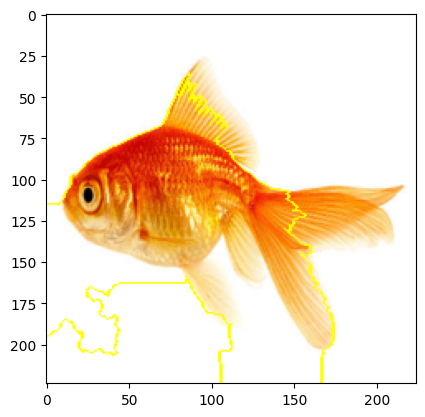

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
img_boundry1 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry1)

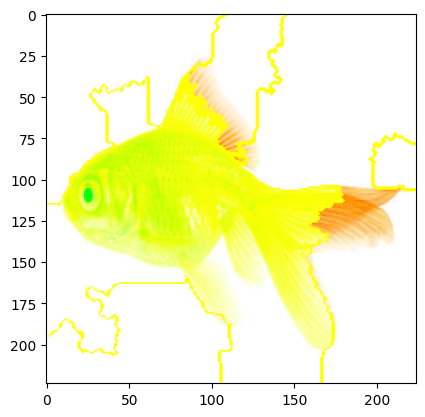

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry2)


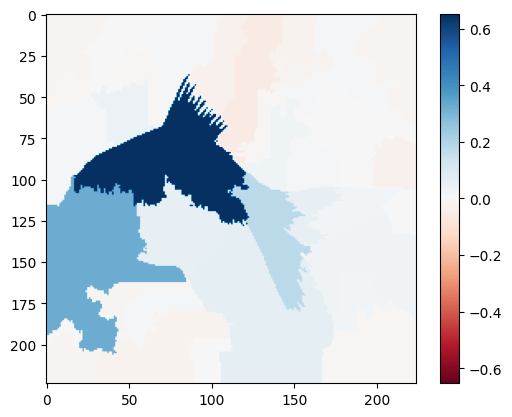

In [ ]:
ind =  explanation.top_labels[0]
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

### part g


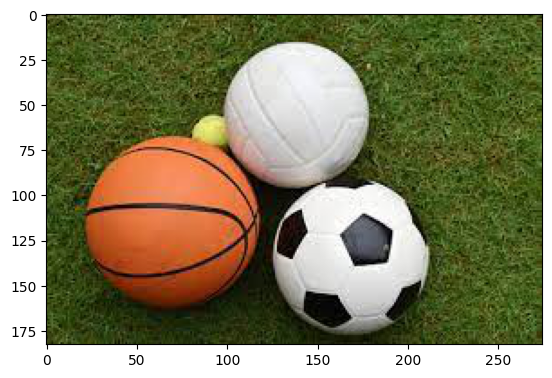

In [ ]:
path = '/content/drive/MyDrive/My-Courses/Truthworthy_AI/HWs/HW2/balls2.jpg'

with open(os.path.abspath(path), 'rb') as f:
    with Image.open(f) as img:
           img.convert('RGB')


plt.imshow(img)

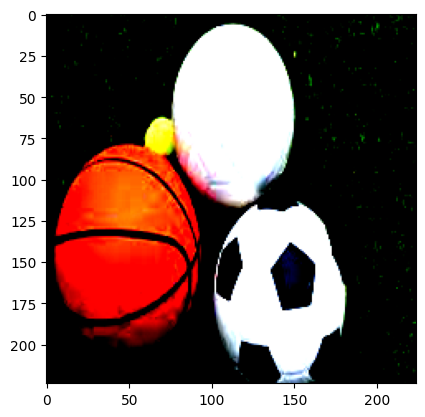

In [ ]:
img_t = get_input_tensors(img)
plt.imshow(np.array(img_t.permute(0, 2, 3, 1)[0]))

In [ ]:
#test = torch.rand(img)

model.eval()
scores = model(img_t)

idx = torch.argmax(scores)
print(idx)
print(classes[idx])

tensor(805)
soccer ball


In [ ]:
probs = F.softmax(scores, dim=1)
probs5 = probs.topk(5)

In [ ]:
idx5 = probs5[1]
for i, j in enumerate(idx5[0]):
    #print(i)
    print("index: ", idx5[0][i], " - probabiliy:", probs5[0][0][i], " - class: ", classes[j])

index:  tensor(805)  - probabiliy: tensor(0.9463, grad_fn=<SelectBackward0>)  - class:  soccer ball
index:  tensor(522)  - probabiliy: tensor(0.0399, grad_fn=<SelectBackward0>)  - class:  croquet ball
index:  tensor(890)  - probabiliy: tensor(0.0061, grad_fn=<SelectBackward0>)  - class:  volleyball
index:  tensor(430)  - probabiliy: tensor(0.0044, grad_fn=<SelectBackward0>)  - class:  basketball
index:  tensor(852)  - probabiliy: tensor(0.0011, grad_fn=<SelectBackward0>)  - class:  tennis ball


In [ ]:
test_pred = batch_predict([pill_transf(img)])
test_pred.squeeze().argmax()

805

In [ ]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(np.array(pill_transf(img)),
                                         batch_predict, # classification function
                                         top_labels=5,
                                         hide_color=0,
                                         num_samples=1000) # number of images that will be sent to classification function

  0%|          | 0/1000 [00:00<?, ?it/s]

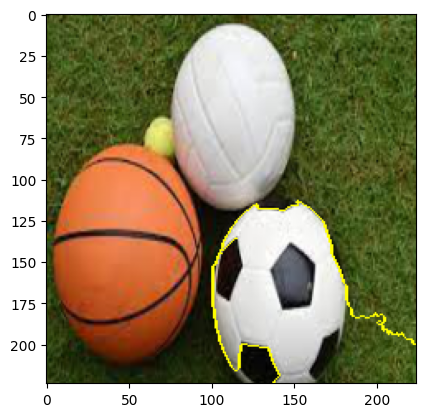

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
img_boundry1 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry1)

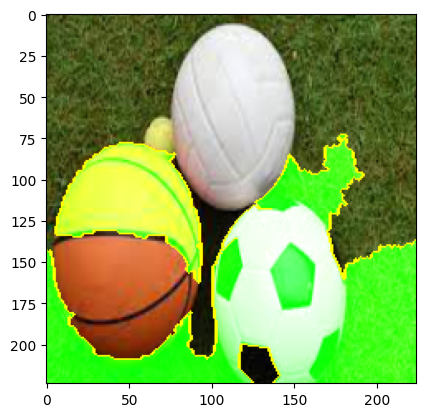

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry2)


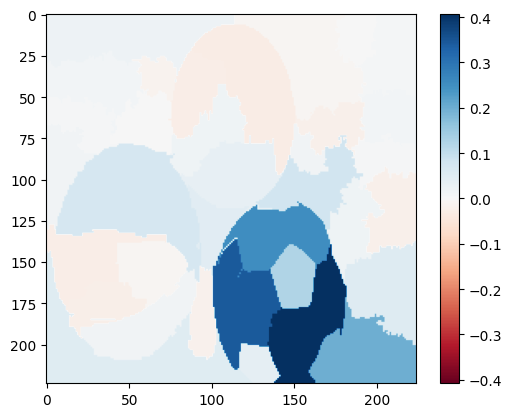

In [ ]:
ind =  explanation.top_labels[0]
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

#### another example

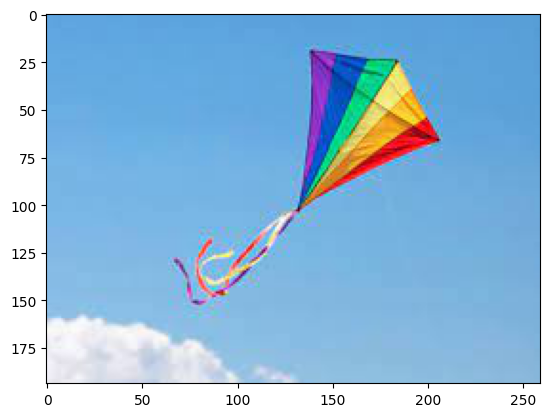

In [ ]:
path = '/content/drive/MyDrive/My-Courses/Truthworthy_AI/HWs/HW2/kite.jpg'

with open(os.path.abspath(path), 'rb') as f:
    with Image.open(f) as img:
           img.convert('RGB')


plt.imshow(img)

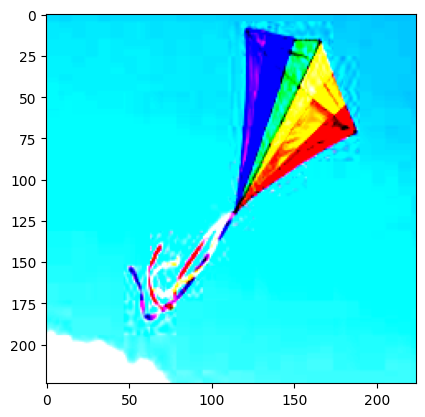

In [ ]:
img_t = get_input_tensors(img)
plt.imshow(np.array(img_t.permute(0, 2, 3, 1)[0]))

In [ ]:
#test = torch.rand(img)

model.eval()
scores = model(img_t)

idx = torch.argmax(scores)
print(idx)
print(classes[idx])

tensor(701)
parachute


In [ ]:
probs = F.softmax(scores, dim=1)
probs5 = probs.topk(5)

In [ ]:
idx5 = probs5[1]
for i, j in enumerate(idx5[0]):
    #print(i)
    print("index: ", idx5[0][i], " - probabiliy:", probs5[0][0][i], " - class: ", classes[j])

index:  tensor(701)  - probabiliy: tensor(0.9245, grad_fn=<SelectBackward0>)  - class:  parachute
index:  tensor(645)  - probabiliy: tensor(0.0310, grad_fn=<SelectBackward0>)  - class:  maypole
index:  tensor(557)  - probabiliy: tensor(0.0173, grad_fn=<SelectBackward0>)  - class:  flagpole
index:  tensor(879)  - probabiliy: tensor(0.0113, grad_fn=<SelectBackward0>)  - class:  umbrella
index:  tensor(417)  - probabiliy: tensor(0.0082, grad_fn=<SelectBackward0>)  - class:  balloon


In [ ]:
test_pred = batch_predict([pill_transf(img)])
test_pred.squeeze().argmax()

701

In [ ]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(np.array(pill_transf(img)),
                                         batch_predict, # classification function
                                         top_labels=5,
                                         hide_color=0,
                                         num_samples=1000) # number of images that will be sent to classification function

  0%|          | 0/1000 [00:00<?, ?it/s]

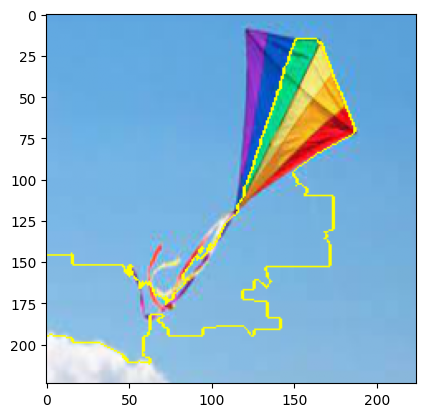

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
img_boundry1 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry1)

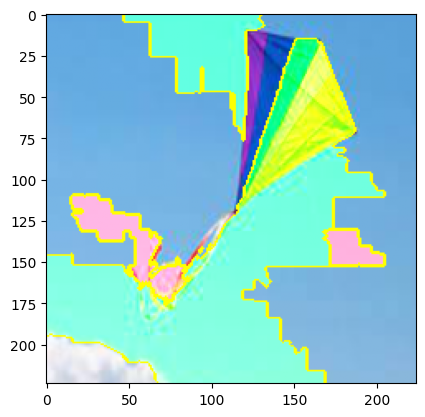

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry2)


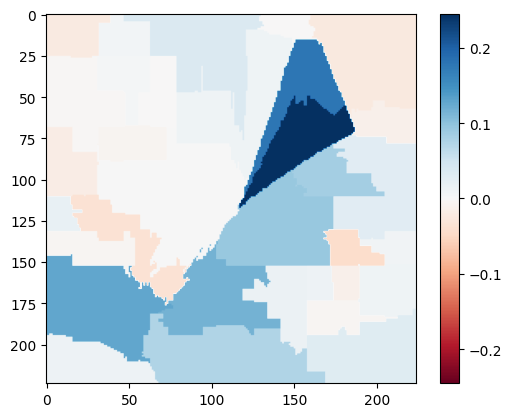

In [ ]:
ind =  explanation.top_labels[0]
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()